# Objective
Basic clustering and analysis for an SNR test image with the following properties:

- Number of spots: 150
- Spot shape: 2D Gaussian (sigma = 1.75 pixels)
- SNR distribution: Gaussian (mu = 5, sigma = 2.5)
- Background image: MAX_ISP_300_1.tif (tissue)
- Spot image generated 20180719
- Sent for annotation 20180719
- Annotations received 20180723

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation
worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = True
img_height = 300

### User: update these

In [2]:
json_filename = 'SynthTests_tissue.json'
gen_date = '20180719'
bg_type = 'tissue'
img_name = 'MAX_ISP_300_1_nspots100_spot_sig1.75_snr5_2.5'

### Load data, get the dataframe 

In [3]:
img_filename = img_name+'spot_img.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()
anno_one_snr = ba.slice_by_image(anno_all, img_filename)
plot_title = img_name

# Overview of Annotations 
#### Worker annotations only

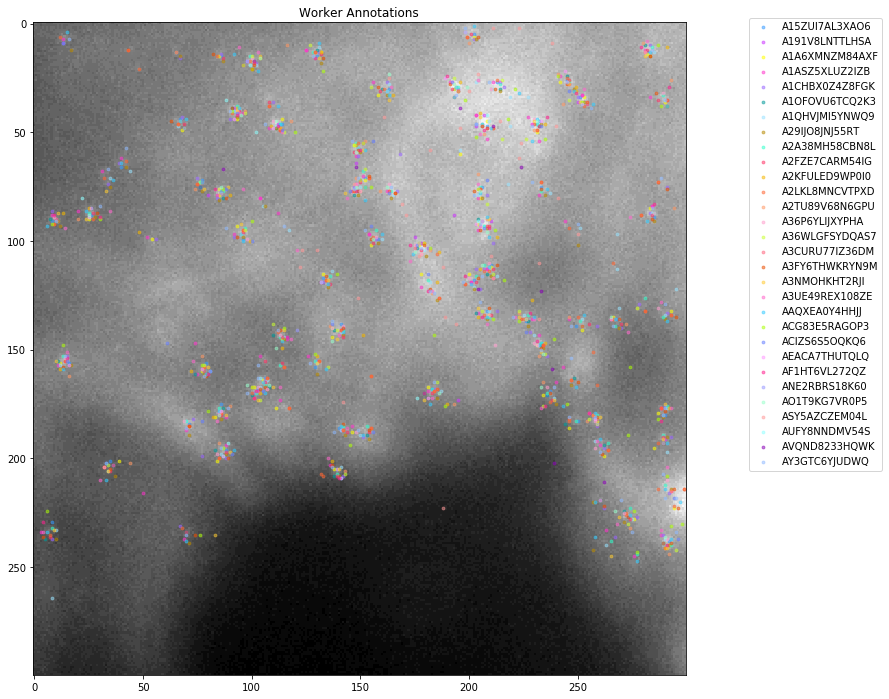

In [4]:
show_ref_points = False
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Show reference points (big yellow dots)

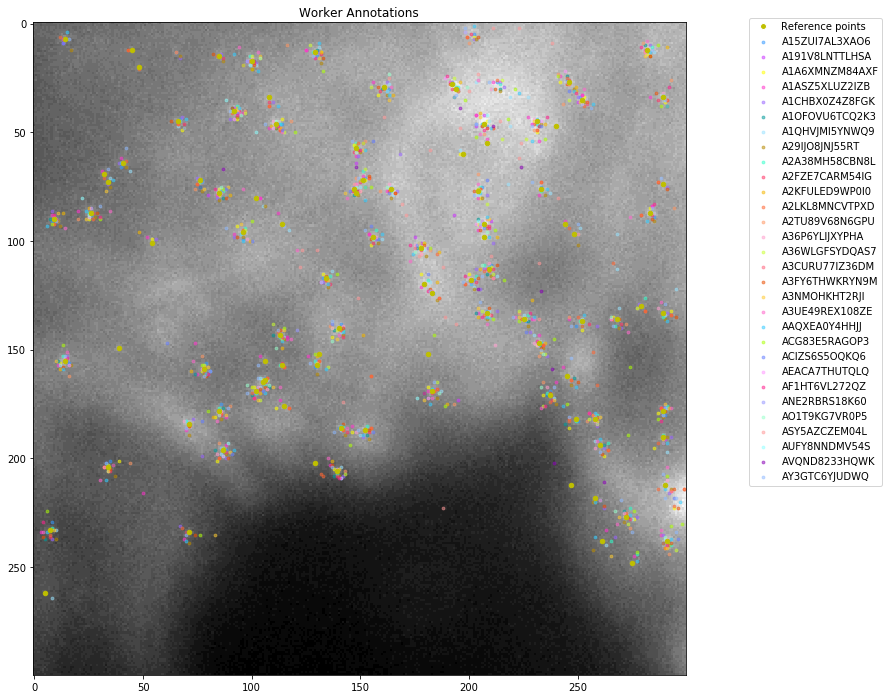

In [5]:
show_ref_points = True
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Worker annotations with cluster centroids

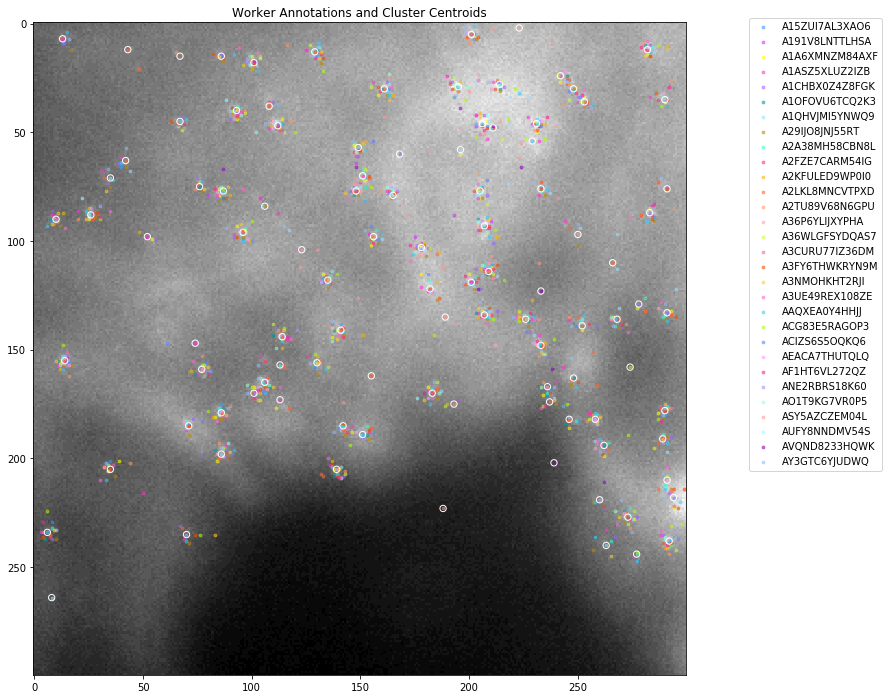

In [6]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_one_snr, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### correctness_threshold = 4, 10, 20

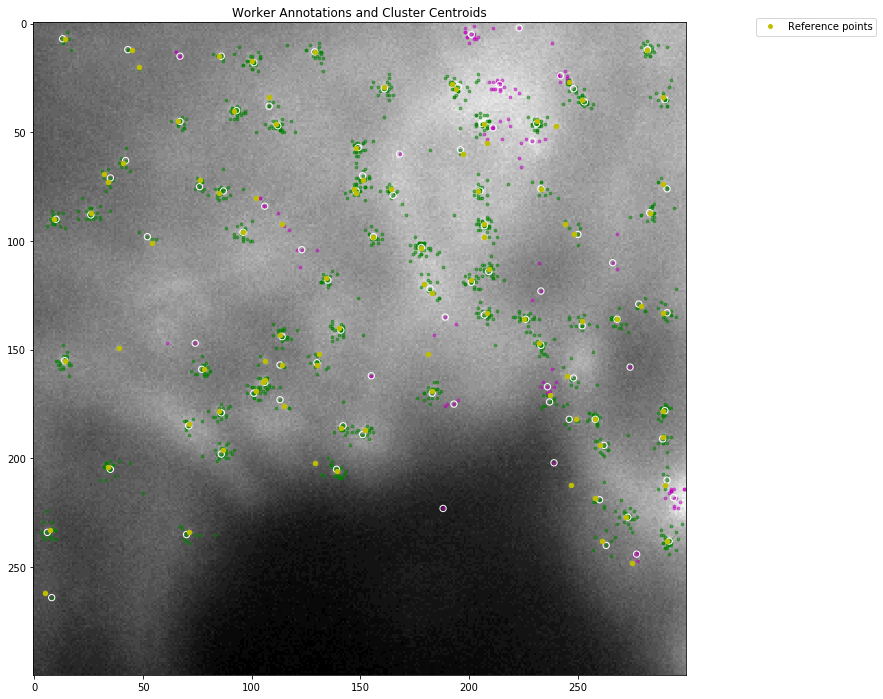

In [7]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 4

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

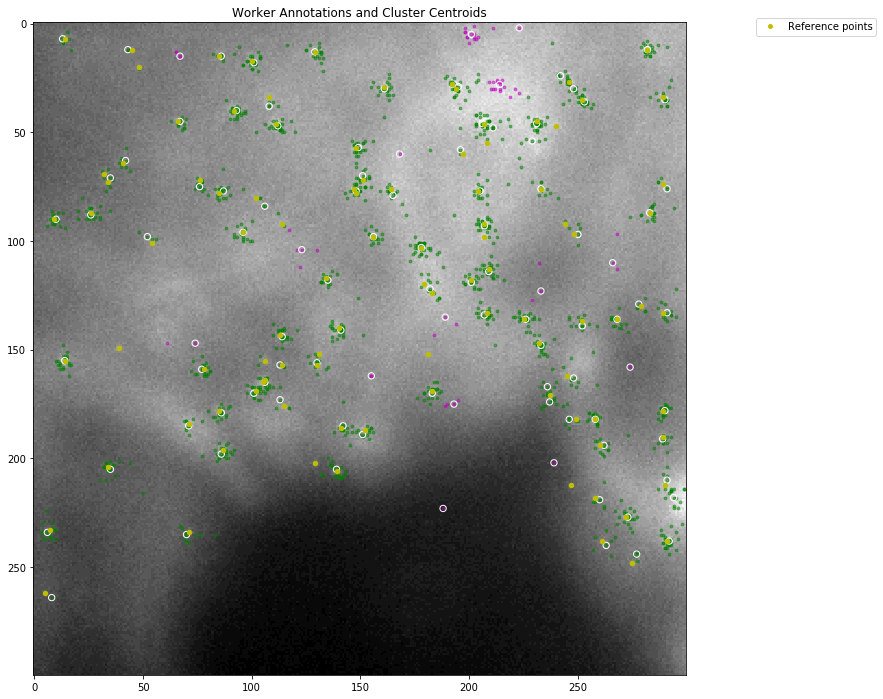

In [8]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 10

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

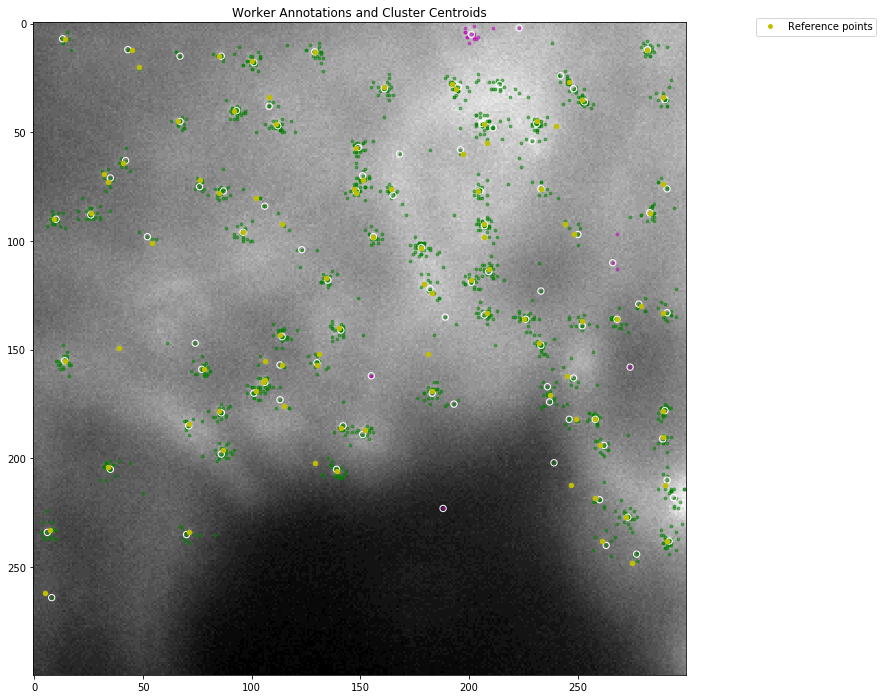

In [9]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 20

sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

# Worker Average Speed

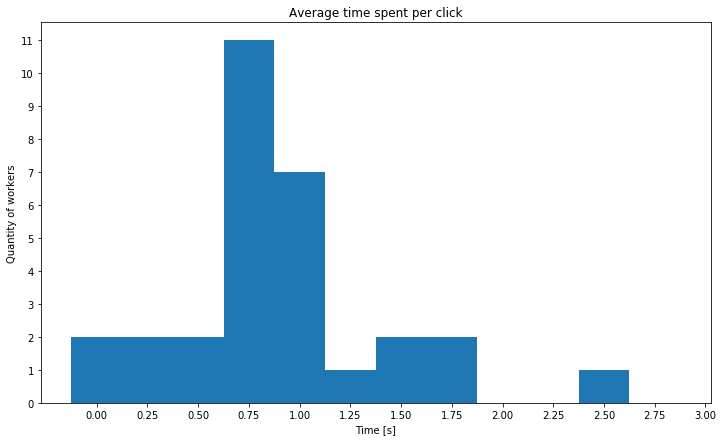

In [10]:
bigger_window_size = False
sa.plot_avg_time_per_click(anno_one_snr, bigger_window_size)
bigger_window_size = True

# Accuracy and Speed
Across clicks, investigate the relationship between accuracy (measured as distance from the click to the nearest neighbor) and speed (measured as the difference between the click's timestamp and the previous click's timestamp).

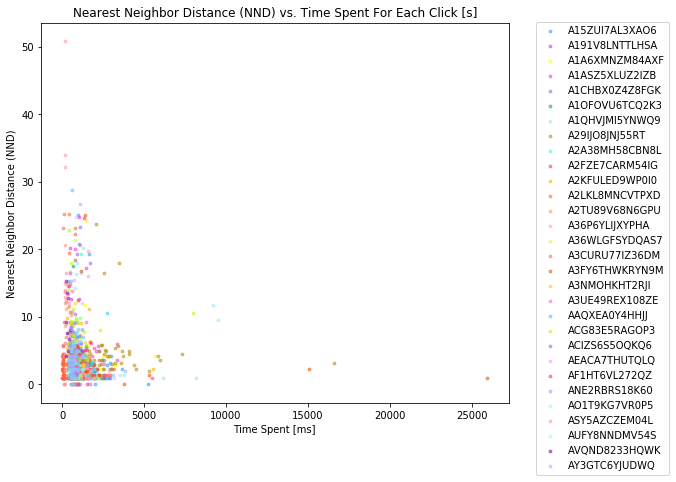

In [11]:
show_correctness = False
correctness_threshold = None
clustering_params = None
sa.plot_nnd_vs_time_spent(anno_all, img_filename, csv_filepath, show_correctness, correctness_threshold, clustering_params)

#### Each point (each click) colored according to the correctness of the cluster of which it is a member:

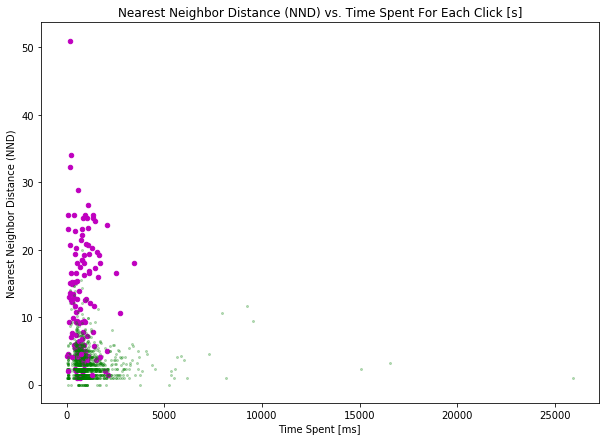

In [12]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
sa.plot_nnd_vs_time_spent(anno_all, img_filename, csv_filepath, show_correctness, correctness_threshold, clustering_params)

# Compare Accuracy Between Workers
Compare accuracy (measured as distance from the click to the nearest neighbor) between different workers in a dataframe. Color each point (each click) according to the correctness of the cluster of which it is a member.

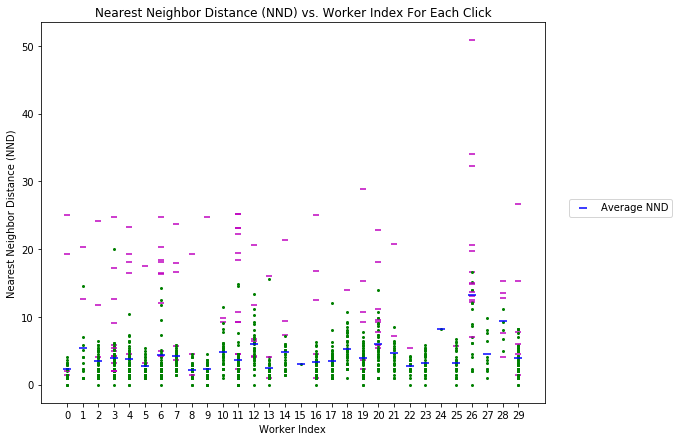

In [13]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
show_avgs = True
sa.plot_nnd_vs_worker_index(anno_all, img_filename, csv_filepath, show_correctness, correctness_threshold, clustering_params, show_avgs)

# Compare Speed Between Workers
Compare speed (measured as the difference between the click's timestamp and the previous click's timestamp) between different workers in a dataframe. Color each point (each click) according to the correctness of the cluster of which it is a member.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


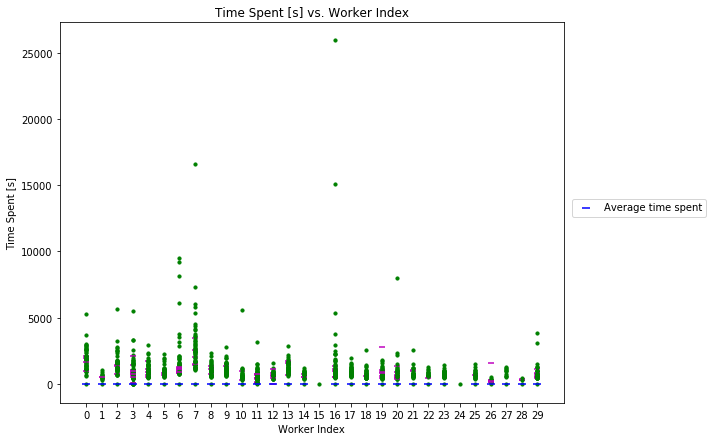

In [14]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
show_avgs = True
sa.plot_time_spent_vs_worker_index(anno_all, img_filename, csv_filepath, show_correctness, correctness_threshold, clustering_params, show_avgs)

# Total Time Spent by Each Worker
For each worker, plot total time spent (defined as the difference between the max timestamp and the min timestamp) vs. worker index. Each bar represents one worker.

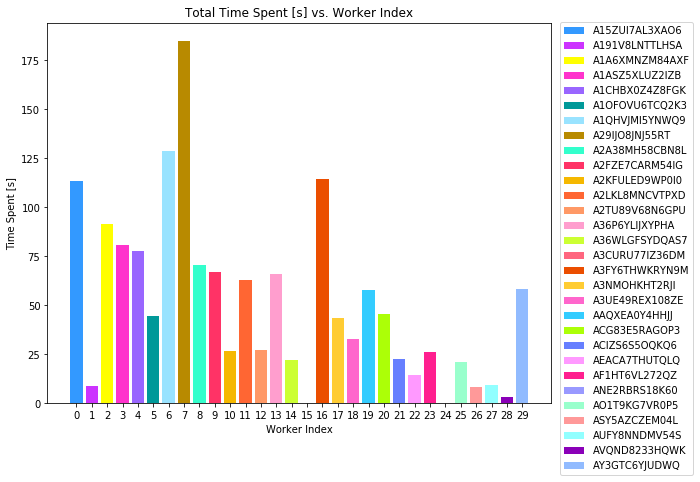

In [15]:
sa.plot_total_time_vs_worker_index(anno_all, img_filename)

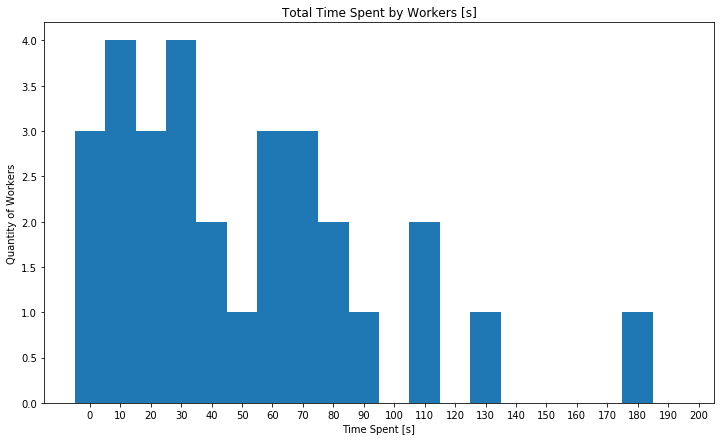

In [16]:
bigger_window_size = False
sa.plot_total_worker_time_hist(anno_one_snr, bigger_window_size)

## Worker Pairwise Scores
For each worker, score = sum(pair scores of that worker).

Pair score for worker_A and worker_B 

= [(avg NND worker_A -> worker_B) + (avg NND worker_B -> worker_A)] / 2

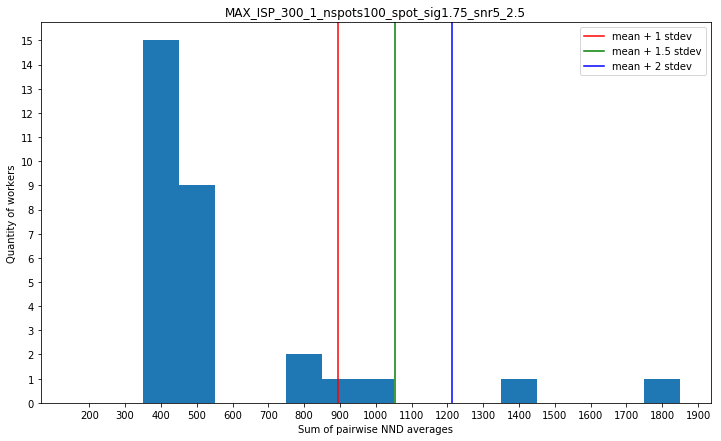

In [17]:
sa.plot_worker_pairwise_scores_hist(anno_one_snr, plot_title, bigger_window_size)

# Worker Error and Correctness
It is helpful to view the following two plots together.

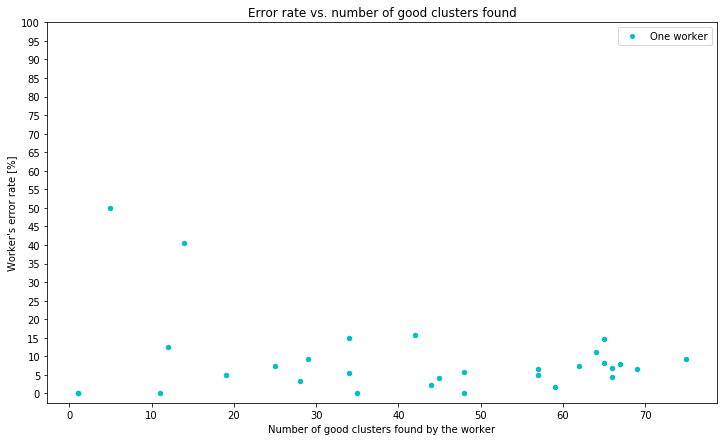

In [18]:
sa.plot_error_rate_vs_spotted(anno_one_snr, clustering_params, correctness_threshold, csv_filepath, img_filename, plot_title, bigger_window_size)

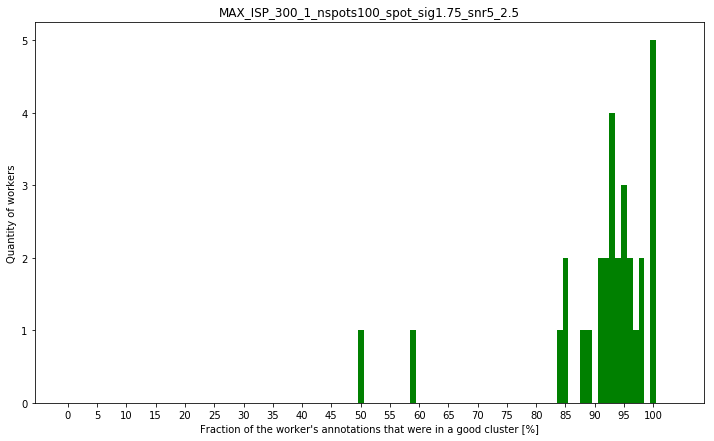

In [19]:
sa.plot_workers_correct_rate(anno_one_snr, clustering_params, correctness_threshold, csv_filepath, img_filename, plot_title, bigger_window_size)

# Spot SNR and Cluster Membership
It is helpful to view the following three plots together.

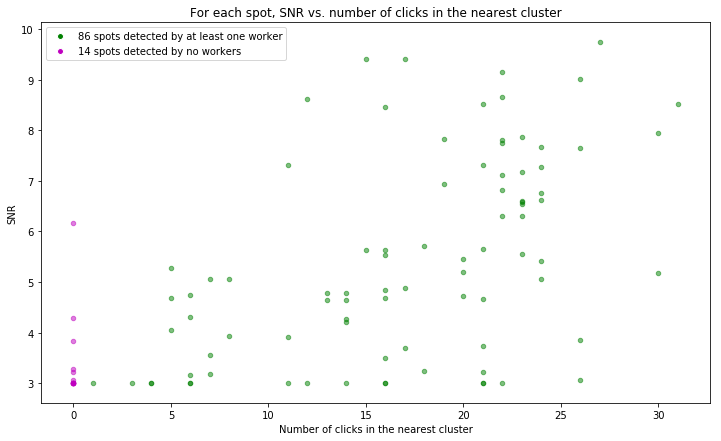

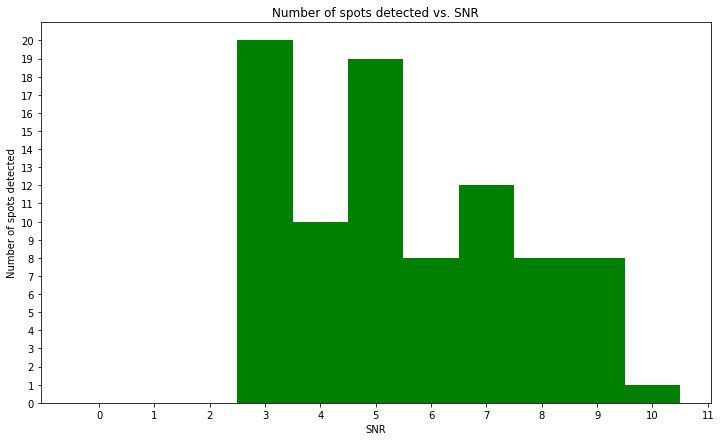

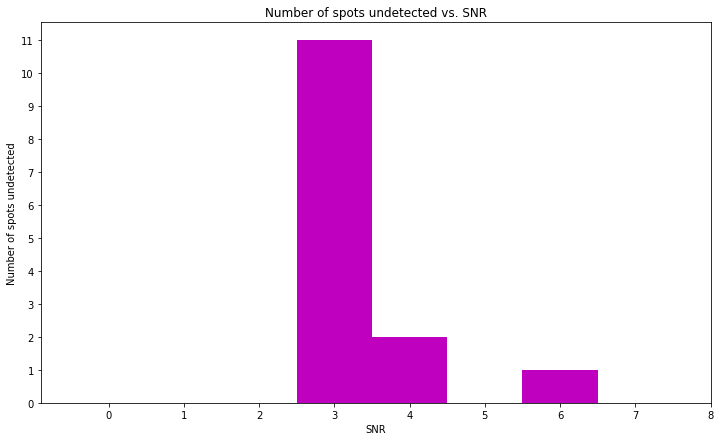

In [20]:
sa.plot_snr_vs_membership(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, bigger_window_size)	